In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
viridis = matplotlib.cm.get_cmap('viridis')

In [4]:
algo = "draw"
runs = ["117", "118"]
data = "simulated"
size = ""
base_str = "../randomsearch_"+algo+"_"+data+size+"_clf/"
n_highest = 25
performance_all = []
param_vals_all = []
losses_all = []

for run in runs:
    param_vals = np.load(base_str+"run_"+run+"/hyperparam_vals_ours.npy")
    losses = np.load(base_str+"run_"+run+"/loss_vals_ours.npy")
    performance = np.load(base_str+"run_"+run+"/performance_ours.npy")
    #print(performance)


    to_del = []
    for i, p in enumerate(performance):
        if len(p[0]) == 2:
            print(i)
            to_del.append(i)

    performance_all.append(np.array(np.delete(performance, to_del, axis=0)))
    param_vals_all.append(np.array(np.delete(param_vals, to_del, axis=0)))
    losses_all.append(np.array(np.delete(losses, to_del, axis=0)))
    
performance = np.concatenate(performance_all, axis=0)
param_vals = np.concatenate(param_vals_all, axis=0)
losses = np.concatenate(losses_all, axis=0)

proton_test_f1 = np.array([p[0][0] for p in performance[:, 1]])
proton_sort_ind = np.flip(np.argsort(proton_test_f1))
sorted_proton_test_f1 = proton_test_f1[proton_sort_ind]

losses = losses[proton_sort_ind][:n_highest]
param_vals = param_vals[proton_sort_ind][:n_highest]
performance = performance[proton_sort_ind][:n_highest]
p = 0
print(len(sorted_proton_test_f1))
print(sorted_proton_test_f1)
print(param_vals[p])
print(performance[p])

258
[0.98613251 0.98497496 0.98471986 0.98333333 0.98273155 0.98019802
 0.97945205 0.97461929 0.97133758 0.97094017 0.96784566 0.96744186
 0.96551724 0.96423017 0.96377953 0.95918367 0.95721078 0.9556962
 0.95024077 0.94920635 0.94899536 0.94736842 0.94230769 0.93864013
 0.9248366  0.92431562 0.91333333 0.90228013 0.90033223 0.89836066
 0.87973641 0.87197232 0.85106383 0.85042017 0.82735043 0.75268817
 0.74856046 0.74392523 0.73764259 0.71724138 0.70689655 0.70550162
 0.70550162 0.7027027  0.69989166 0.69848156 0.69848156 0.69565217
 0.69565217 0.69423286 0.69245648 0.69138495 0.69138495 0.68995633
 0.68995633 0.68995633 0.68995633 0.68852459 0.68852459 0.68708972
 0.6856517  0.6856517  0.6856517  0.6856517  0.6856517  0.68421053
 0.68421053 0.68421053 0.68421053 0.68421053 0.68421053 0.68276619
 0.68131868 0.68131868 0.68131868 0.67986799 0.67986799 0.67986799
 0.67986799 0.67985612 0.6784141  0.6784141  0.676957   0.676957
 0.67549669 0.67549669 0.67549669 0.67549669 0.67403315 0.674

/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


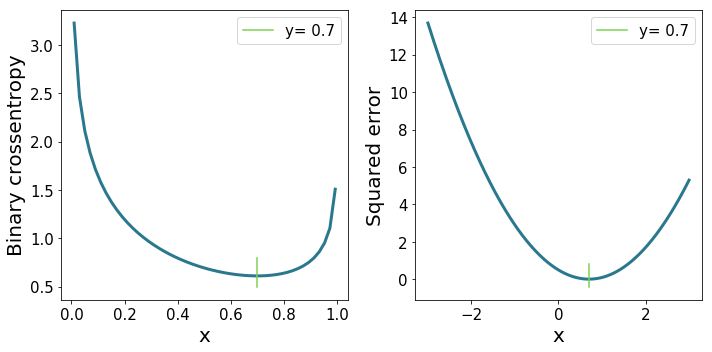

In [3]:
def binary_crossent(x, y=1): return -(y*np.log(x) + (1-y)*np.log(1-x))
def mse(x, y=1): return np.power(x-y, 2)

x = np.linspace(-3, 3, 300)
y = [0.7, ] #np.linspace(1e-3, 1, 5)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
for y_ in y:
    ax[0].plot(x, binary_crossent(x, y_), linewidth=3, color=viridis(0.4))
    ax[0].plot([y_,]*2,[0.5, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[0].set_xlabel("x", size=20)
    ax[0].set_ylabel("Binary crossentropy", size=20)
    ax[0].legend(fontsize=15)
    
    ax[1].plot(x, mse(x, y_), linewidth=3, color=viridis(0.4))
    ax[1].plot([y_,]*2,[-0.4, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[1].set_xlabel("x", size=20)
    ax[1].set_ylabel("Squared error", size=20)
    ax[1].legend(fontsize=15)
    
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

In [8]:
print(performance.shape)
print("experiments, train/test, scores, classes")
print(performance[0])

(25, 2, 3, 2)
experiments, train/test, scores, classes
[[[0.98813376 0.98739977]
  [0.99890949 0.97621744]
  [0.97758805 0.99884125]]

 [[0.98132428 0.98199673]
  [1.         0.96463023]
  [0.96333333 1.        ]]]


In [5]:
losses.shape

(25, 2, 200)

In [6]:
a = [print(h[-1], h[0]) for h in param_vals]

20 [[8, 8, 32, 32, 4], [17, 17, 9, 9, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]
20 [[8, 8, 8, 8, 8], [5, 5, 5, 5, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]
40 {'read_N': 5, 'write_N': 5, 'write_N_sq': 25, 'delta_w': 0.5163265306122449, 'delta_r': 1.0714285714285716}
10 [[16, 16, 32, 16], [15, 13, 9, 3], [2, 2, 2, 2], [0, 0, 0, 0], 4]
10 {'read_N': 12, 'write_N': 5, 'write_N_sq': 25, 'delta_w': 0.5326530612244897, 'delta_r': 1.0224489795918368}
3 {'read_N': 60, 'write_N': 40, 'write_N_sq': 1600, 'delta_w': 0.7285714285714286, 'delta_r': 1.1857142857142857}
40 [[16, 32, 4], [7, 5, 3], [2, 2, 2], [0, 0, 0], 3]
10 {'read_N': 12, 'write_N': 40, 'write_N_sq': 1600, 'delta_w': 1.006122448979592, 'delta_r': 0.5979591836734695}
40 {'read_N': 12, 'write_N': 12, 'write_N_sq': 144, 'delta_w': 1.1857142857142857, 'delta_r': 0.7122448979591837}
3 {'read_N': 12, 'write_N': 5, 'write_N_sq': 25, 'delta_w': 0.9571428571428572, 'delta_r': 0.5163265306122449}
3 {'read_N': 40, 'write_N': 5, 'write_N_sq': 25,

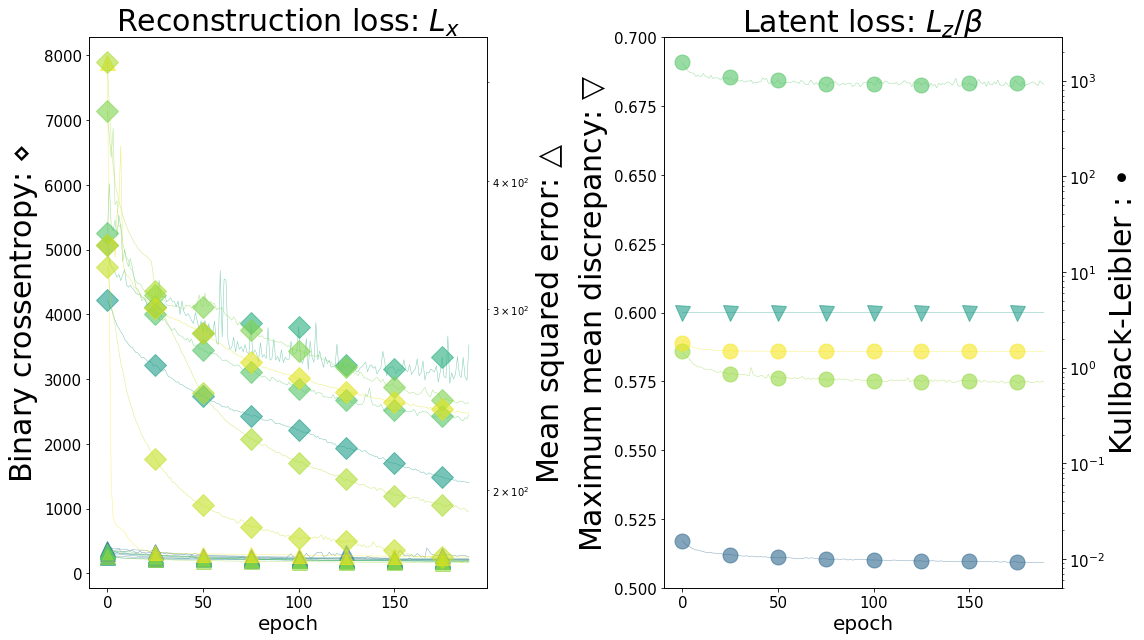

In [28]:
loss_names = [r"$L_x$", r"$L_z/\beta$"]
n_plot = 20
fig, ax = plt.subplots(ncols=losses.shape[1], figsize=(16, 9))
colors = viridis(np.linspace(0.3, max(sorted_proton_test_f1), n_plot))
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

#fig.suptitle("Loss curves from simulated parameter search", size=35)

label_size = 30
ax[1].set_ylabel(r"Maximum mean discrepancy: $\bigtriangledown$", size=label_size)
ax3.set_ylabel(r"Kullback-Leibler : $\bullet$", size=label_size)

ax2.set_ylabel(r"Mean squared error: $\bigtriangleup$", size=label_size)
ax[0].set_ylabel(r"Binary crossentropy: $\diamond$", size=label_size)

ax[0].set_title(r"Reconstruction loss: "+loss_names[0], size=30)
ax[1].set_title("Latent loss: "+loss_names[1], size=30)

for j in range(n_plot):
    if j == 5:
        continue
    if j == 8:
        continue
    for i, a in enumerate(ax):
        if i == 1:
            beta = param_vals[j][1][0]
            mode = param_vals[j][2]
            which = None
            for l, v in mode.items():
                if v:
                    if l != "batchnorm":
                        which = l
            if which == "include_KL":
                fmt = "o-"
                a = ax3
            elif which == "include_MMD":
                fmt = "v-"
                a = ax[1]
            else:
                fmt = "-"
        else:
            beta = 1
            if param_vals[j][-3] is None:
                fmt = "^-"
            else:
                fmt = "D-"
                a = ax2
        loss = losses[j, i, 10:]/beta
        a.semilogy(
            np.arange(loss.shape[0]),
            loss,
            fmt,
            markevery=25,
            color=colors[j],
            markersize=15,
            linewidth=0.5,
            alpha=0.6
        )
        a.tick_params(axis='both', which='major', labelsize=15)
        a.set_xlabel("epoch", size=20)

ax[0].set_yscale("linear")
ax[1].set_yscale("linear")
ax[1].set_ylim(0.5, 0.7)#("linear")
#ax[0].set_yticks([1e3, 1e3, 1e2])
plt.tight_layout()
plt.savefig("../plots/"+data+"_clf/randomsearch_loss"+algo+".png")
plt.savefig("../plots/"+data+"_clf/randomsearch_loss"+algo+".pdf")

In [32]:
import pandas as pd 
columns_conv = [
    "proton f1 score",
    "T",
    "N parameters",
    "largest kernel",
    "N layers",
    r"$D_{enc}$",
    r"$D_{enc}$",
    "latent dimension",
    "latent loss",
    "reconstruction loss",
    "activation function",
    "batchnorm",
    r"$\beta$",
    r"$\beta_1$",
    r"$\eta$",
]

columns_attn = [
    "proton f1 score",
    "T",
    r"$N_{read}$",
    r"$N_{write}$",
    r"$\delta$",
    r"$\hat{\delta}$"
    "latent dimension",
    "latent loss",
    "reconstruction loss",
    "activation function",
    "batchnorm",
    r"$\beta$",
    r"$\beta_1$",
    r"$\eta$",
]

categorical_cols = [
    "latent loss",
    "reconstruction loss",
    "activation function",
]
param_performance_conv = np.zeros((performance.shape[0], len(columns_conv))).astype(object)

for i in range(performance.shape[0]):
    config = param_vals[i]
    p_f1 = sorted_proton_test_f1[i]
    beta1 = config[1][2]
    beta = config[1][1]
    latent_dim = config[1][4]
    eta=config[1][1]
    mode_config = config[2]
    batchnorm = mode_config["batchnorm"]

    latent_loss = "mmd" if mode_config["include_MMD"] else "kld"
    if latent_loss == "kld":
        latent_loss = latent_loss if mode_config["include_KL"] else "none"

    reconst_loss = config[4]
    if reconst_loss is None:
        reconst_loss = "bce"

    T = config[-1]
    activation = config[5]
    
    if isinstance(config[0], list):
        n_params = 0
        for f, k in zip(config[0][0], config[0][1]):
            n_params += k**2*f
        n_layers = config[0][4]
        end_size = 80/(2**n_layers)
      
        param_performance_conv[i] = [
            p_f1,
            T,
            n_params,
            config[0][1][0],
            n_layers,
            latent_dim,
            latent_loss,
            reconst_loss,
            activation,
            batchnorm,
            beta,
            beta1,
            eta
        ]

perf_df = pd.DataFrame(param_performance_conv, columns=columns)

In [33]:
test_df = perf_df.copy()
for c in categorical_cols:
    dummy = pd.get_dummies(test_df[c])
    test_df = pd.concat([test_df, dummy], axis=1)
    test_df = test_df.drop(c, axis=1)

In [34]:
test_df

,proton f1 score,N parameters,largest kernel,N layers,latent dimension,batchnorm,$\beta$,$\beta_1$,$\eta$,0.0,kld,mmd,none,0.0,bce,mse,0.0,lrelu,relu,tanh
0,0.986133,9844,17,5,10,False,0.001,0.642584,0.001,0,0,1,0,0,1,0,0,0,0,1
1,0.984975,872,5,5,20,False,1e-05,0.559716,1e-05,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,0.983333,9040,15,4,10,True,1e-05,0.358731,1e-05,0,0,0,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
6,0.979452,1620,7,3,3,True,1e-05,0.252095,1e-05,0,0,1,0,0,1,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
from scipy.stats import spearmanr
test_df = test_df.astype(float)
corr_array = np.zeros((len(test_df.columns), 2))
for i, c in enumerate(test_df.columns):
    w, p = spearmanr(test_df[c], test_df["proton f1 score"])
    corr_array[i] = [w, p]

corr_m = pd.DataFrame(corr_array, columns=[r"$\rho_s$", "p"], index=test_df.columns)

In [ ]:
corr_m

In [ ]:
print(corr_m.to_latex(float_format=lambda x: "{:.2g}".format(x),  escape=False),)

In [ ]:
param_vals[3]

In [35]:
perf_df

,proton f1 score,N parameters,largest kernel,N layers,latent dimension,latent loss,reconstruction loss,activation function,batchnorm,$\beta$,$\beta_1$,$\eta$
0,0.986133,9844,17,5,10,mmd,bce,tanh,False,0.001,0.642584,0.001
1,0.984975,872,5,5,20,kld,bce,relu,False,1e-05,0.559716,1e-05
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0.983333,9040,15,4,10,none,bce,lrelu,True,1e-05,0.358731,1e-05
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0.979452,1620,7,3,3,mmd,bce,tanh,True,1e-05,0.252095,1e-05
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(perf_df.to_latex(
    #"../tables/randomsearch_convae_simulated_clf/hyperparams.tex",
    index=False,
    longtable=False,
    float_format=lambda x: "{:.2g}".format(x)
))

In [5]:
with open("../metrics_clf/simulated/f1_scores2000.tex") as fo:
    s = "".join(fo.readlines())
print(s)

 & \multicolumn{3}{c}{Proton} & \multicolumn{3}{c}{Carbon} \\  
 \hline 
 & f1 & recall & precision & f1 & recall & precision\\  
 Train & $ \underset{ \num{+- 7.03e-02 } } {\num{ 0.88 } }  $ & $ \underset{ \num{+- 5.93e-02 } } {\num{ 0.88 } }  $ & $ \underset{ \num{+- 8.56e-02 } } {\num{ 0.86 } }  $ & $ \underset{ \num{+- 4.39e-02 } } {\num{ 0.90 } }  $ & $ \underset{ \num{+- 5.32e-02 } } {\num{ 0.89 } }  $ & $ \underset{ \num{+- 7.37e-02 } } {\num{ 0.87 } }  $ \\ 
  Test & $ \underset{ \num{+- 7.07e-02 } } {\num{ 0.88 } }  $ & $ \underset{ \num{+- 6.40e-02 } } {\num{ 0.89 } }  $ & $ \underset{ \num{+- 7.67e-02 } } {\num{ 0.87 } }  $ & $ \underset{ \num{+- 6.06e-02 } } {\num{ 0.90 } }  $ & $ \underset{ \num{+- 6.80e-02 } } {\num{ 0.89 } }  $ & $ \underset{ \num{+- 7.11e-02 } } {\num{ 0.88 } }  $
 
